In [37]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import time
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [36]:
# Load the dataset
train_data = pd.read_csv('/home/ateium/SMAI/Assignment-I/crypto_data/train_data.csv')
val_data = pd.read_csv('/home/ateium/SMAI/Assignment-I/crypto_data/val_data.csv')
test_data = pd.read_csv('/home/ateium/SMAI/Assignment-I/crypto_data/test_data.csv')

In [4]:

# Combine train and validation data for preprocessing
#data = pd.concat([train_data, val_data], ignore_index=True)
# it is shaallow copy so no issues (:
# except there IS and issue ):

# Drop primary key column
train_data = train_data.drop(columns=['Address'])
val_data = val_data.drop(columns=['Address'])
test_data = test_data.drop(columns=['Address'])

# Handle missing/NaN values with mean
train_data = train_data.fillna(train_data.mean())
val_data = val_data.fillna(val_data.mean())
test_data = test_data.fillna(test_data.mean())


In [5]:
print(train_data.head())


   FLAG  Avg min between sent tnx  Avg min between received tnx  \
0     1                    333.22                       1836.33   
1     1                      0.00                        269.50   
2     0                   6180.19                       3503.34   
3     0                      0.00                         47.60   
4     0                      0.00                       1955.01   

   Time Diff between first and last (Mins)  Unique Received From Addresses  \
0                                157384.67                              66   
1                                206082.30                              10   
2                                551924.28                              14   
3                                475945.68                            4594   
4                                226781.43                               3   

   min value received  max value received   avg val received  min val sent  \
0            0.018293             1.609584        

In [6]:
print(val_data.head())

   FLAG  Avg min between sent tnx  Avg min between received tnx  \
0     1                      0.00                        414.74   
1     0                      5.18                       3097.77   
2     0                   6088.80                          0.00   
3     1                     98.05                         61.57   
4     0                     16.31                         11.51   

   Time Diff between first and last (Mins)  Unique Received From Addresses  \
0                                 38495.18                               6   
1                                350628.03                               5   
2                                 18266.40                               1   
3                                  2658.92                              31   
4                                124430.37                            1133   

   min value received  max value received   avg val received  min val sent  \
0            0.002000             0.407611        

In [7]:
print(test_data.head())

   FLAG  Avg min between sent tnx  Avg min between received tnx  \
0     1                    363.82                       9549.79   
1     0                    128.05                       2676.14   
2     0                   4023.23                       3397.59   
3     0                      0.00                       1655.30   
4     1                      0.00                          0.00   

   Time Diff between first and last (Mins)  Unique Received From Addresses  \
0                                263665.35                              25   
1                               1044781.85                               4   
2                               1003591.43                              33   
3                                226776.60                               3   
4                                     0.00                               1   

   min value received  max value received   avg val received  min val sent  \
0             0.00000             0.599257        

In [8]:
# Scale the features with large ranges
scaler = StandardScaler()
scal_train_data = pd.DataFrame(scaler.fit_transform(train_data.drop(columns=['FLAG'])), columns=train_data.columns[1:])
scal_val_data = pd.DataFrame(scaler.transform(val_data.drop(columns=['FLAG'])), columns=val_data.columns[1:])
scal_test_data = pd.DataFrame(scaler.transform(test_data.drop(columns=['FLAG'])), columns=test_data.columns[1:])

scal_train_data['FLAG'] = train_data['FLAG']
scal_val_data['FLAG'] = val_data['FLAG']
scal_test_data['FLAG'] = test_data['FLAG']

In [9]:
print(scal_train_data.head(), scal_val_data.head(), scal_test_data.head())

   Avg min between sent tnx  Avg min between received tnx  \
0                 -0.182073                     -0.221686   
1                 -0.189577                     -0.290670   
2                 -0.050388                     -0.148291   
3                 -0.189577                     -0.300440   
4                 -0.189577                     -0.216461   

   Time Diff between first and last (Mins)  Unique Received From Addresses  \
0                                -0.099735                        0.139906   
1                                 0.052808                       -0.064686   
2                                 1.136139                       -0.050072   
3                                 0.898140                       16.682623   
4                                 0.117647                       -0.090260   

   min value received  max value received   avg val received  min val sent  \
0           -0.085898            -0.034843         -0.124065     -0.039640   
1       

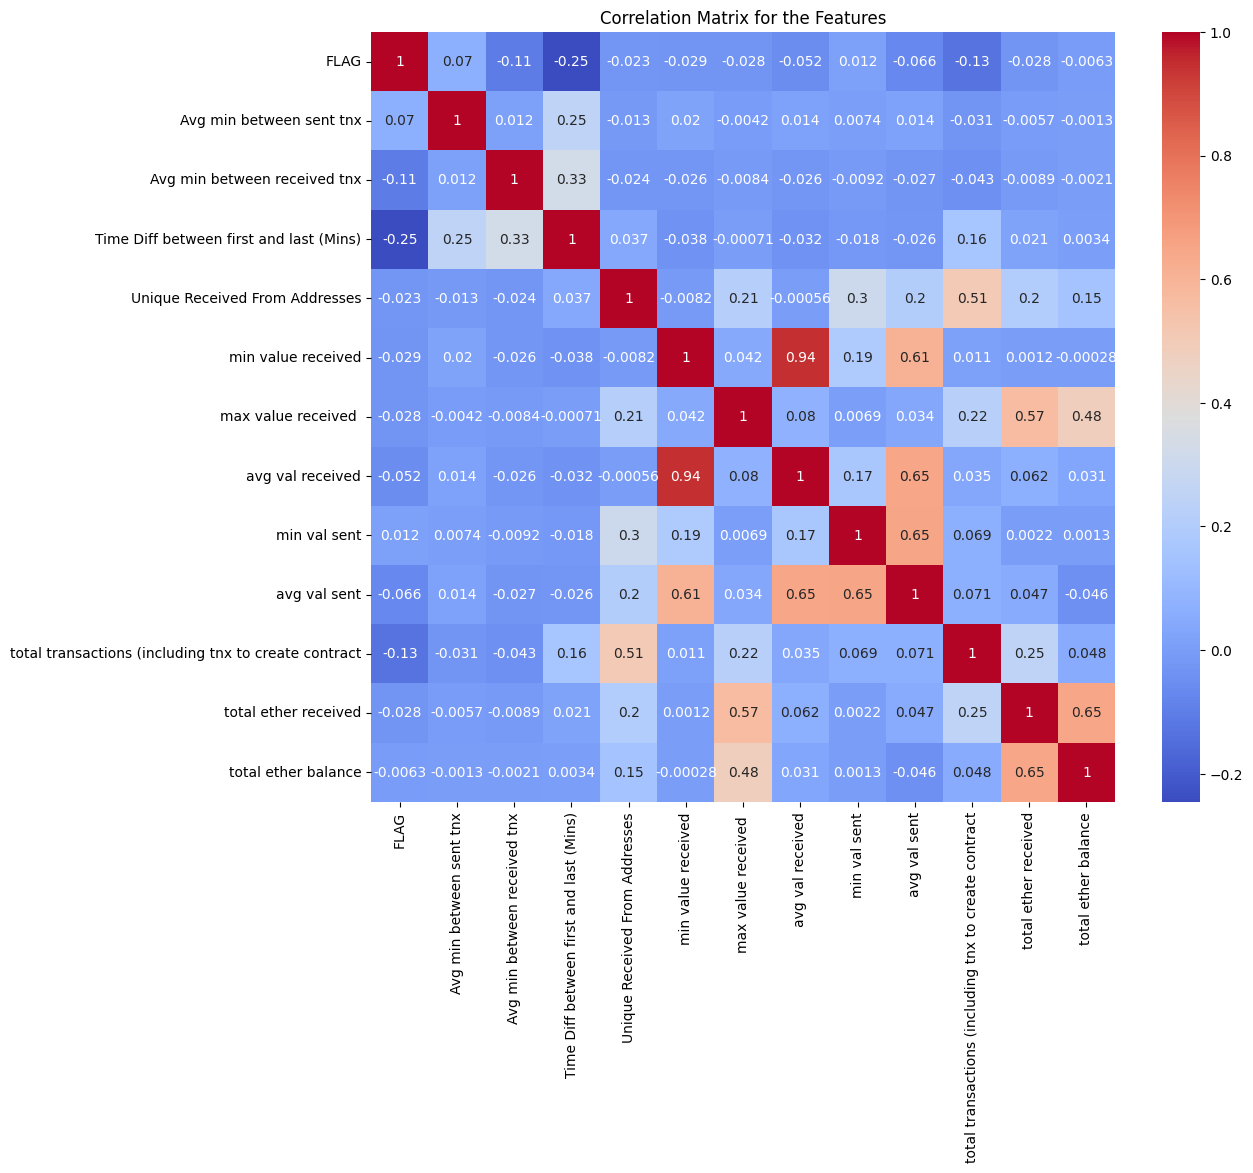

In [10]:

# Plot the correlation matrix
plt.figure(figsize=(12, 10))
correlation_matrix = train_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix for the Features')
plt.show()

# Observations about the correlation matrix
# (Write your observations here based on the heatmap)


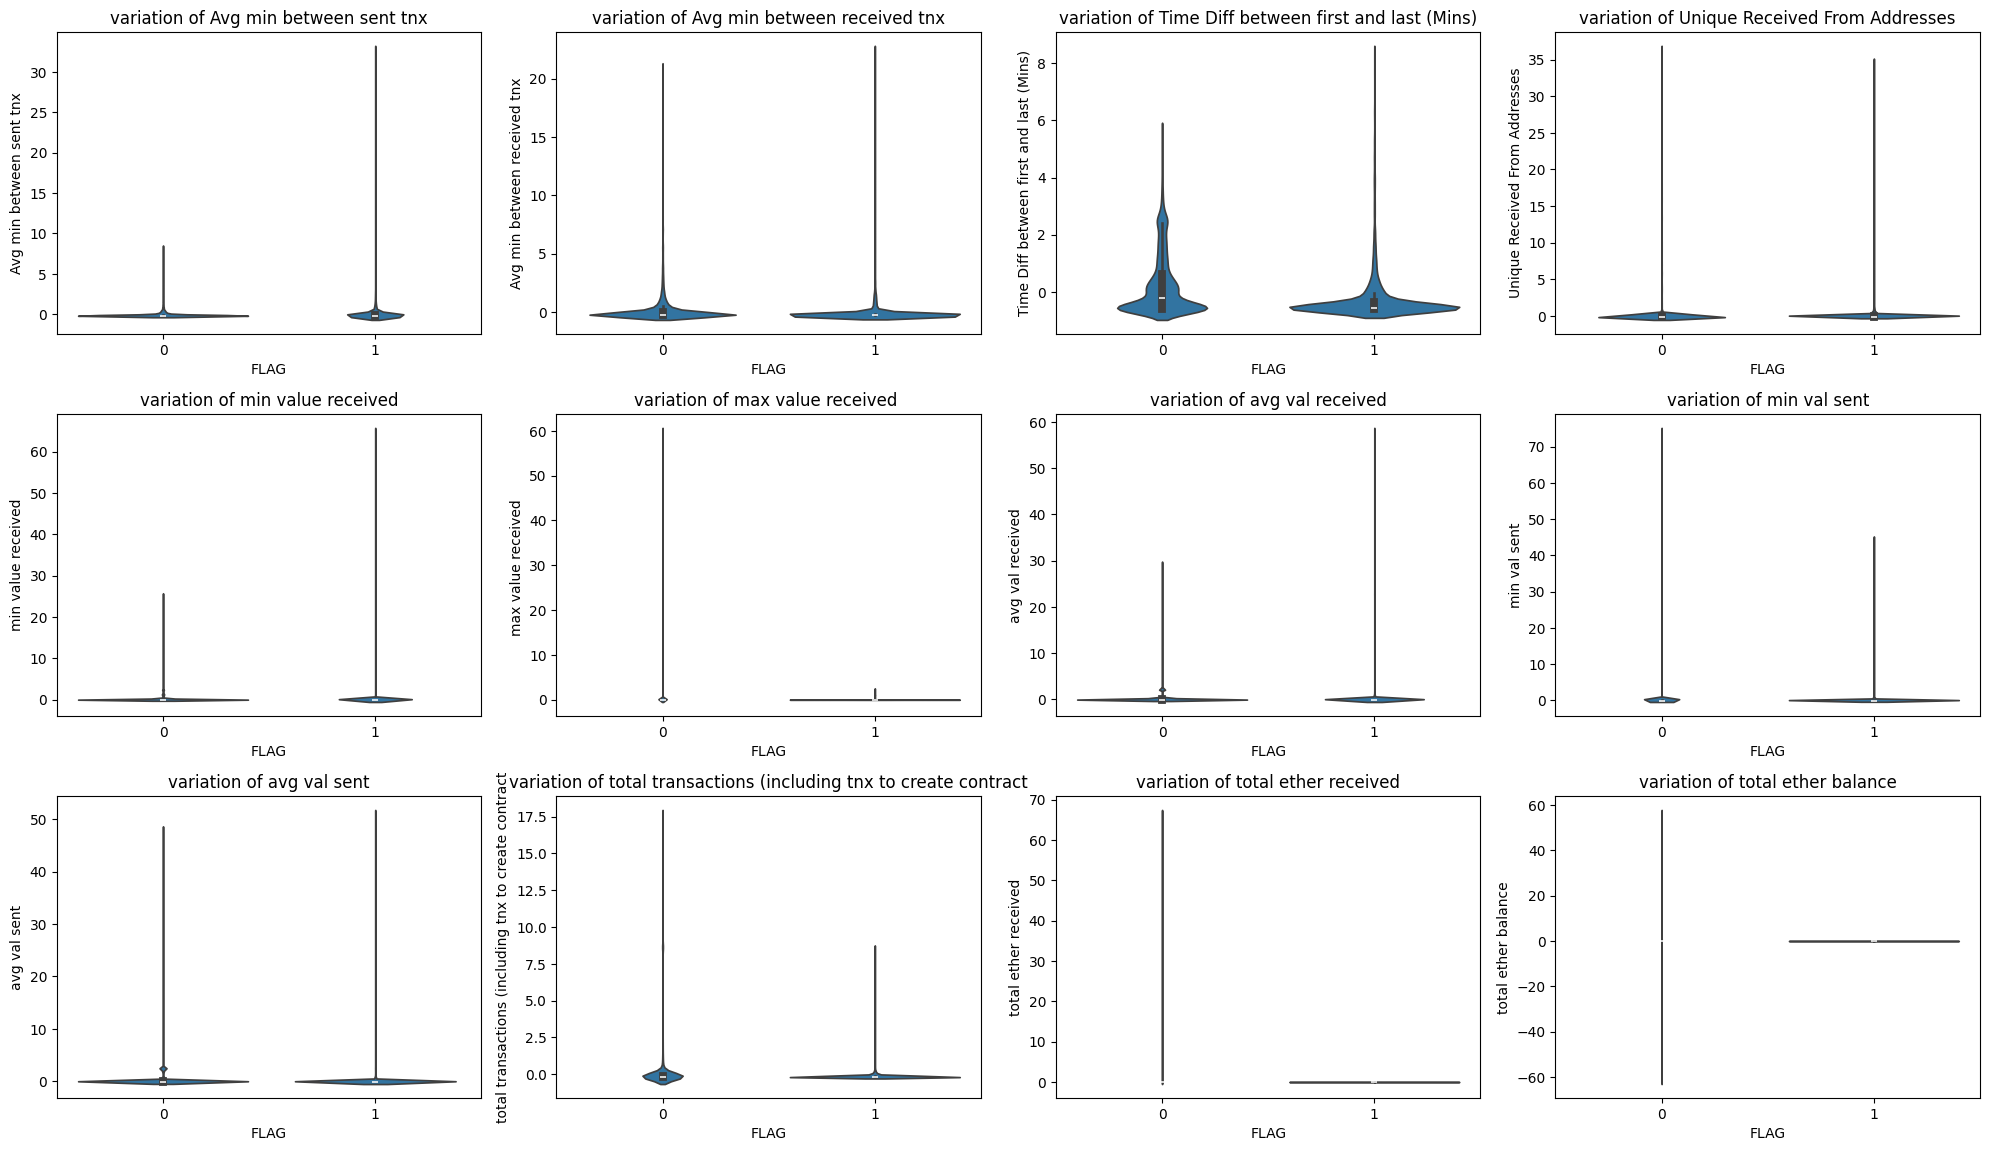

In [11]:

# Plot violin plots for each feature with respect to the FLAG column
plt.figure(figsize=(20, 15))
for i, column in enumerate(scal_train_data.columns[:-1], 1):
    plt.subplot(4, 4, i)
    sns.violinplot(x='FLAG', y=column, data=scal_train_data)
    plt.title(f'variation of {column}')
plt.tight_layout()
plt.show()

# Observations about the violin plots
# (Write your observations here based on the violin plots)

In [12]:
# remeove min value since it has high correlation with avg value
scal_train_data = scal_train_data.drop(columns=['min value received'])
scal_val_data = scal_val_data.drop(columns=['min value received'])
scal_test_data = scal_test_data.drop(columns=['min value received'])

In [13]:
print(scal_train_data.head(), scal_val_data.head(), scal_test_data.head())

   Avg min between sent tnx  Avg min between received tnx  \
0                 -0.182073                     -0.221686   
1                 -0.189577                     -0.290670   
2                 -0.050388                     -0.148291   
3                 -0.189577                     -0.300440   
4                 -0.189577                     -0.216461   

   Time Diff between first and last (Mins)  Unique Received From Addresses  \
0                                -0.099735                        0.139906   
1                                 0.052808                       -0.064686   
2                                 1.136139                       -0.050072   
3                                 0.898140                       16.682623   
4                                 0.117647                       -0.090260   

   max value received   avg val received  min val sent  avg val sent  \
0            -0.034843         -0.124065     -0.039640     -0.137587   
1            -0.0348

# Decision Trees

In [25]:
class DecisionTree:
    def __init__(self, max_depth=None):
        self.max_depth = max_depth
        self.tree = None

    def fit(self, X, y):
        data = X.copy()
        data['target'] = y
        self.tree = self._build_tree(data, depth=0)

    def predict(self, X):
        return X.apply(self._predict_row, axis=1)

    def _entropy(self, y):
        proportions = y.value_counts(normalize=True)
        return -sum(proportions * np.log2(proportions))

    def _information_gain(self, data, split_name, split_value, target_name):
        total_entropy = self._entropy(data[target_name])
        left_split = data[data[split_name] <= split_value]
        right_split = data[data[split_name] > split_value]
        weighted_entropy = (len(left_split) / len(data)) * self._entropy(left_split[target_name]) + \
                           (len(right_split) / len(data)) * self._entropy(right_split[target_name])
        return total_entropy - weighted_entropy

    def _best_split(self, data, target_name):
        split_columns = data.columns.drop(target_name)
        best_gain = -1
        best_split = None
        for col in split_columns:
            unique_values = data[col].unique()
            for value in unique_values:
                gain = self._information_gain(data, col, value, target_name)
                if gain > best_gain:
                    best_gain = gain
                    best_split = (col, value)
        return best_split

    def _build_tree(self, data, depth):
        target_name = 'target'
        if len(data[target_name].unique()) == 1:
            return data[target_name].iloc[0]
        if self.max_depth and depth >= self.max_depth:
            return data[target_name].mode().iloc[0]
        best_split = self._best_split(data, target_name)
        if not best_split:
            return data[target_name].mode().iloc[0]
        split_col, split_value = best_split
        tree = {split_col: {'<=': split_value, 'left': {}, 'right': {}}}
        left_split = data[data[split_col] <= split_value]
        right_split = data[data[split_col] > split_value]
        tree[split_col]['left'] = self._build_tree(left_split, depth + 1)
        tree[split_col]['right'] = self._build_tree(right_split, depth + 1)
        return tree

    def _predict_row(self, row):
        node = self.tree
        while isinstance(node, dict):
            split_feature = next(iter(node))
            split_value = node[split_feature]['<=']
            if row[split_feature] <= split_value:
                node = node[split_feature]['left']
            else:
                node = node[split_feature]['right']
        return node
    def print_tree(self, node=None, depth=0):
        if node is None:
            node = self.tree
        if isinstance(node, dict):
            split_feature = next(iter(node))
            split_value = node[split_feature]['<=']
            print(f"{'|   ' * depth}{split_feature} <= {split_value}")
            self.print_tree(node[split_feature]['left'], depth + 1)
            self.print_tree(node[split_feature]['right'], depth + 1)
        else:
            print(f"{'|   ' * depth}Leaf: {node}")



In [21]:
# Prepare the data
X_train = scal_train_data.drop(columns=['FLAG'])
y_train = scal_train_data['FLAG']

In [27]:
# Train the decision tree
tree = DecisionTree(max_depth=6)
tree.fit(X_train, y_train)

In [29]:
tree7 = DecisionTree(max_depth=7)
tree7.fit(X_train, y_train)

In [26]:
print(tree.tree)

{'total transactions (including tnx to create contract': {'<=': np.float64(-0.18400410460204614), 'left': np.int64(1), 'right': {'total ether received': {'<=': np.float64(-0.030685251765940096), 'left': {'Unique Received From Addresses': {'<=': np.float64(-0.07564638631087493), 'left': {'Avg min between received tnx': {'<=': np.float64(-0.24239626585308047), 'left': {'Avg min between sent tnx': {'<=': np.float64(-0.18942567047517858), 'left': np.int64(0), 'right': np.int64(1)}}, 'right': {'total ether received': {'<=': np.float64(-0.03090630710343557), 'left': np.int64(0), 'right': np.int64(0)}}}}, 'right': {'Avg min between received tnx': {'<=': np.float64(-0.1960301124014866), 'left': {'total transactions (including tnx to create contract': {'<=': np.float64(2.838490885480618), 'left': np.int64(1), 'right': np.int64(0)}}, 'right': {'avg val received': {'<=': np.float64(-0.12455739539699391), 'left': np.int64(1), 'right': np.int64(1)}}}}}}, 'right': {'Unique Received From Addresses': 

In [34]:
# Make predictions
X_val = scal_val_data.drop(columns=['FLAG'])
y_val = scal_val_data['FLAG']
predictions = tree.predict(X_val)
predictions7 = tree7.predict(X_val)
# Calculate accuracy
accuracy = (predictions == y_val).mean()
accuracy7 = (predictions7 == y_val).mean()
print(f'Validation Accuracy with depth 6: {accuracy:.2f}')
print(f'Validation Accuracy with depth 7: {accuracy7:.2f}')

Validation Accuracy with depth 6: 0.87
Validation Accuracy with depth 7: 0.88


# SciKit's Tree

In [38]:
# Prepare the data
X_train = scal_train_data.drop(columns=['FLAG'])
y_train = scal_train_data['FLAG']
X_val = scal_val_data.drop(columns=['FLAG'])
y_val = scal_val_data['FLAG']
X_test = scal_test_data.drop(columns=['FLAG'])
y_test = scal_test_data['FLAG']


In [41]:

# Repeating the 6
start_time = time.time()
tree6 = DecisionTree(max_depth=6)
tree6.fit(X_train, y_train)
train_predictions_custom = tree6.predict(X_train)
val_predictions_custom = tree6.predict(X_val)
test_predictions_custom = tree6.predict(X_test)
custom_train_time = time.time() - start_time

custom_train_accuracy = accuracy_score(y_train, train_predictions_custom)
custom_val_accuracy = accuracy_score(y_val, val_predictions_custom)
custom_test_accuracy = accuracy_score(y_test, test_predictions_custom)



In [40]:
# Train and evaluate scikit-learn decision tree
start_time = time.time()
sklearn_tree = DecisionTreeClassifier(max_depth=6)
sklearn_tree.fit(X_train, y_train)
train_predictions_sklearn = sklearn_tree.predict(X_train)
val_predictions_sklearn = sklearn_tree.predict(X_val)
test_predictions_sklearn = sklearn_tree.predict(X_test)
sklearn_train_time = time.time() - start_time

sklearn_train_accuracy = accuracy_score(y_train, train_predictions_sklearn)
sklearn_val_accuracy = accuracy_score(y_val, val_predictions_sklearn)
sklearn_test_accuracy = accuracy_score(y_test, test_predictions_sklearn)



In [44]:
# Print results
print("Custom Decision Tree:")
print(f"Training Time: {custom_train_time:.4f} seconds")
print(f"Train Accuracy: {custom_train_accuracy:.4f}")
print(f"Validation Accuracy: {custom_val_accuracy:.4f}")
print(f"Test Accuracy: {custom_test_accuracy:.4f}")

print("\nScikit-learn Decision Tree:")
print(f"Training Time: {sklearn_train_time:.4f} seconds")
print(f"Train Accuracy: {sklearn_train_accuracy:.4f}")
print(f"Validation Accuracy: {sklearn_val_accuracy:.4f}")
print(f"Test Accuracy: {sklearn_test_accuracy:.4f}")

# Analyze performance differences
print("\nPerformance Analysis:")
print("1. Training Time: Custom implementation much slower due to lack of optimizations.")
print("(Scikit-learn uses optimized Cython code for faster computation.)")

Custom Decision Tree:
Training Time: 263.0627 seconds
Train Accuracy: 0.8790
Validation Accuracy: 0.8711
Test Accuracy: 0.8774

Scikit-learn Decision Tree:
Training Time: 0.0443 seconds
Train Accuracy: 0.8948
Validation Accuracy: 0.8728
Test Accuracy: 0.8954

Performance Analysis:
1. Training Time: Custom implementation much slower due to lack of optimizations.
(Scikit-learn uses optimized Cython code for faster computation.)


In [3]:
!pfetch

       /\         ateium@archlinu 
      /  \        os     Arch Linux
     /\   \       host   HP Pavilion x360 2-in-1 Laptop 14-ek0xxx
    /      \      kernel 6.13.2-zen1-1-zen
   /   ,,   \     uptime 9m
  /   |  |  -\    pkgs   2233
 /_-''    ''-_\   memory 10074M / 15702M

